# EXPLORATORY DATA ANALYSIS OF INSURANCE

DATA DESCRIPTON:
The data at hand contains medical costs of people
characterized by certain attributes.

Domain: Healthcare

#Context:
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

Attribute Information:

age: age of primary beneficiary

sex : insurance contractor gender, female, male

bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
 objective index of body weight (kg / m ^ 2) using the ratio ofheight to weight, ideally 18.5 to 24.9
children : Number of children covered by health insurance /Number of dependents

smoker : Smoking

region : the beneficiary's residential area in the US, northeast,

southeast, southwest, northwest.

charges : Individual medical costs billed by health insurance


## 1. Import the necessary libraries

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import scipy.stats as stats

## 2. Read the data as a data frame

In [2]:
# load the insurance data
insurance_data = pd.read_csv('../DataSet/insurance.csv')

# read the data as data frame
insurance_data_frame = pd.DataFrame(insurance_data)
# display data of 5 rows
insurance_data_frame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southwest,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Perform basic EDA


## a) shape of the data: 

In [3]:
# shape of the data
insurance_data_frame.shape

(1338, 7)

Details of shape of data: 

insurance data contains total 7 columns (attributes) and 1338 rows(attributes data) 

### b) Data type of each attribute

In [8]:
insurance_data_frame.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Details of each data type

age, children : data type of these attributes are int64

sex, smoker, region : data type of these attributes are object

bmi, charges : data types of these attributes are float64    

    Feature name             Variable type
-----------------       -------------
    age                     numbers

    bmi                     numbers

    charges                 numbers

    children                numbers

    sex                     Nominal

    smoker                  Nominal

    region                  String

## c) Checking the presence of missing values

In [5]:
insurance_data_frame.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The insurance data does not contain any missing values

## d) 5 point summary of numerical attributes

In [6]:
insurance_data_frame.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Inurance minimum age is 18 and maximum is 64 years old

The average medical charges are 13270.

The min bmi is 15.96 and max bmi is 53.13

The min childers are 0 and max children having 5.

In [46]:
#  another way of calculating of 5 point summary of numberical attributes of individual attribute
def calFivePointSummary(data, attribute):
    mean = data[attribute].mean()
    min = data[attribute].min()
    max = data[attribute].max()
    quartile_25 = np.percentilae(data[attribute], [25])
    quartile_75 = np.percentile(data[attribute], [75])
    
    print ('-------------------------------')
    print ('5 point summary of : '''+ attribute + ' attribute')
    print ('-------------------------------')
    print (attribute + ': mean : ', mean, 
           '\n'+ attribute+ ': min : ', min, 
           '\n'+ attribute+ ': max : ', max, 
           '\n'+ attribute+ ': quartile_25 : ', quartile_25, 
           '\n'+ attribute+ ': quartile_75 : ', quartile_75)

In [47]:
calFivePointSummary(insurance_data_frame, 'age')
calFivePointSummary(insurance_data_frame, 'bmi')
calFivePointSummary(insurance_data_frame, 'charges')
calFivePointSummary(insurance_data_frame, 'children')

-------------------------------
5 point summary of : age attribute
-------------------------------
age: mean :  39.20702541106129 
age: min :  18 
age: max :  64 
age: quartile_25 :  [27.] 
age: quartile_75 :  [51.]
-------------------------------
5 point summary of : bmi attribute
-------------------------------
bmi: mean :  30.663396860986538 
bmi: min :  15.96 
bmi: max :  53.13 
bmi: quartile_25 :  [26.29625] 
bmi: quartile_75 :  [34.69375]
-------------------------------
5 point summary of : charges attribute
-------------------------------
charges: mean :  13270.422265141257 
charges: min :  1121.8739 
charges: max :  63770.42801 
charges: quartile_25 :  [4740.28715] 
charges: quartile_75 :  [16639.912515]
-------------------------------
5 point summary of : children attribute
-------------------------------
children: mean :  1.0949177877429 
children: min :  0 
children: max :  5 
children: quartile_25 :  [0.] 
children: quartile_75 :  [2.]


## e) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

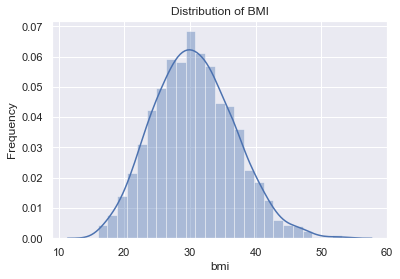

In [48]:
# distrubition of bmi column
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
sns.distplot(insurance_data_frame['bmi'])
plt.show()

The BMI distribution is bell shaped and symmetrical

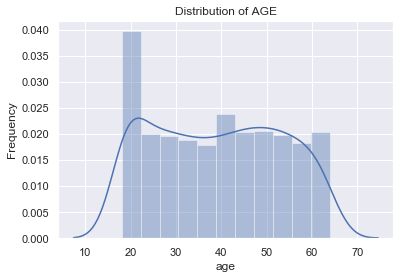

In [49]:
# distrubition of age column
plt.title('Distribution of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')
sns.distplot(insurance_data_frame['age'])
plt.show()

The AGE distribution is mostly uniform, except for age below 25 histogram peaks

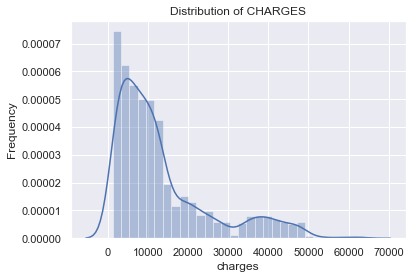

In [50]:
# distrubition of charges column
plt.title('Distribution of CHARGES')
plt.xlabel('CHARGES')
plt.ylabel('Frequency')
sns.distplot(insurance_data_frame['charges'])
plt.show()

The Charges distribution is skewed towards right

## f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’


In [51]:

bmi_skew = insurance_data_frame['bmi'].skew()

print ('Measure of Skewness of BMI: ', bmi_skew )

age_skew = insurance_data_frame['age'].skew()

print ('Measure of Skewness of AGE:', age_skew )

charges_skew = insurance_data_frame['charges'].skew()

print ('Measure of Skewness of CHARGES: ', charges_skew )


Measure of Skewness of BMI:  0.2840471105987448
Measure of Skewness of AGE: 0.05567251565299186
Measure of Skewness of CHARGES:  1.5158796580240388


The atrributes BMI,AGE and CHANGES are skewed towards right whch indicates the tail on right side of the curve is longer than left side of the curve. The charges shows high skewness than BMI and AGE skews.

## g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [54]:
# define a function for identifying the outliers
def find_outliers(data, attribute):
    # sort the attribute
    data.sort_values(by=attribute)
    # quartile 25: indicates first quartile
    quartiles_25 = np.percentile(data[attribute], [25]) 
    # quartile 75: indicates third quartile
    quartiles_75 = np.percentile(data[attribute], [75])
    # inter quartile range
    IQR =  quartiles_75 - quartiles_25
    # find lower bound q1 - (1.5 *IQR)
    lower_bound = quartiles_25 - (1.5 * IQR)
    # find upper bound  q3 - (1.5 *IQR)
    upper_bound = quartiles_75  + (1.5 * IQR )
    
    print ('Presense Of Outliers In ' + attribute.upper())
    print ('---------------------------')

    print (attribute + ': quartile_75 : ', quartiles_75, 
           '\n'+ attribute+ ': quartile_25 : ', quartiles_25, 
           '\n'+ attribute+ ': IQR : ', IQR, 
           '\n'+ attribute+ ': lower_bound : ', lower_bound, 
           '\n'+ attribute+ ': upper_bound : ', upper_bound)
    
    print (attribute + ': Any data lower than : ' , lower_bound , ' and upper than :' , upper_bound , ' is considered as outlier')

Presense Of Outliers In BMI
---------------------------
bmi: quartile_75 :  [34.69375] 
bmi: quartile_25 :  [26.29625] 
bmi: IQR :  [8.3975] 
bmi: lower_bound :  [13.7] 
bmi: upper_bound :  [47.29]
bmi: Any data lower than :  [13.7]  and upper than : [47.29]  is considered as outlier


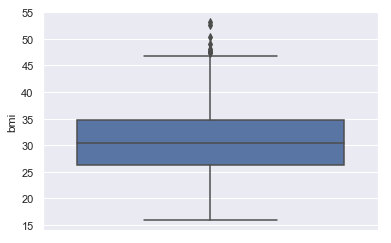

In [56]:
# presence of outliers in ‘bmi’
find_outliers(insurance_data_frame,'bmi')
sns.boxplot(y=insurance_data_frame['bmi'])
plt.show()

Presense Of Outliers In AGE
---------------------------
age: quartile_75 :  [51.] 
age: quartile_25 :  [27.] 
age: IQR :  [24.] 
age: lower_bound :  [-9.] 
age: upper_bound :  [87.]
age: Any data lower than :  [-9.]  and upper than : [87.]  is considered as outlier


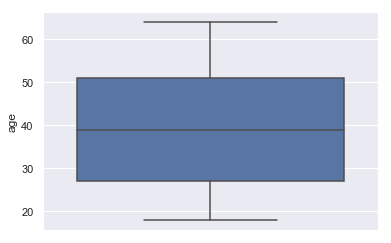

In [58]:
# presence of outliers in ‘age’
find_outliers(insurance_data_frame,'age')
sns.boxplot(y=insurance_data_frame['age'])
plt.show()

Presense Of Outliers In CHARGES
---------------------------
charges: quartile_75 :  [16639.912515] 
charges: quartile_25 :  [4740.28715] 
charges: IQR :  [11899.625365] 
charges: lower_bound :  [-13109.1508975] 
charges: upper_bound :  [34489.3505625]
charges: Any data lower than :  [-13109.1508975]  and upper than : [34489.3505625]  is considered as outlier


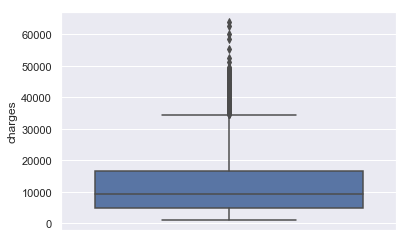

In [59]:
# presence of outliers in ‘charges’
find_outliers(insurance_data_frame,'charges')
sns.boxplot(y=insurance_data_frame['charges'])
plt.show()

## h) Distribution of categorical columns (include children)

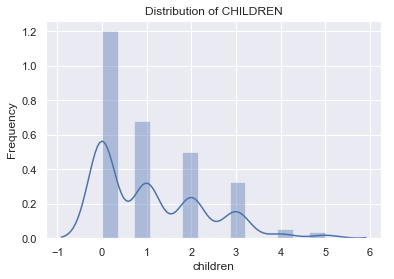

In [61]:
plt.title('Distribution of CHILDREN')
plt.xlabel('CHILDREN')
plt.ylabel('Frequency')
sns.distplot(insurance_data_frame['children'])
plt.show()

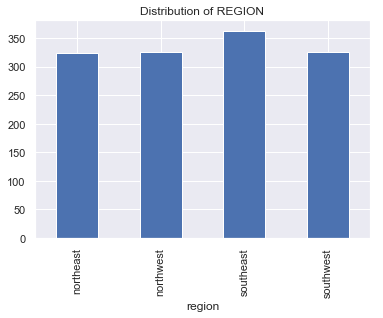

In [62]:
dataregion = insurance_data.groupby("region").size()
dataregion.plot.bar(title='Distribution of REGION')
plt.show()

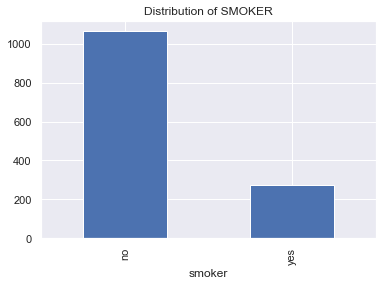

In [63]:
datasmoker = insurance_data.groupby("smoker").size()
datasmoker.plot.bar(title='Distribution of SMOKER')
plt.show()

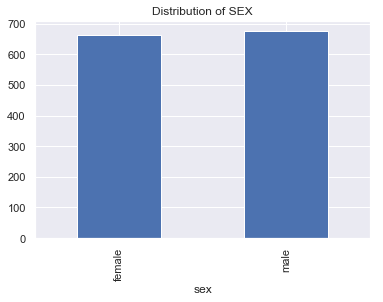

In [64]:
datagender = insurance_data.groupby("sex").size()
datagender.plot.bar(title='Distribution of SEX')
plt.show()

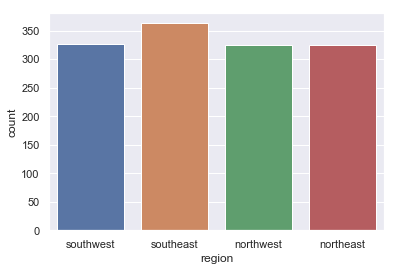

In [65]:
sns.countplot(insurance_data_frame['region'])

## i) Pair plot that includes all the columns of the dataframe

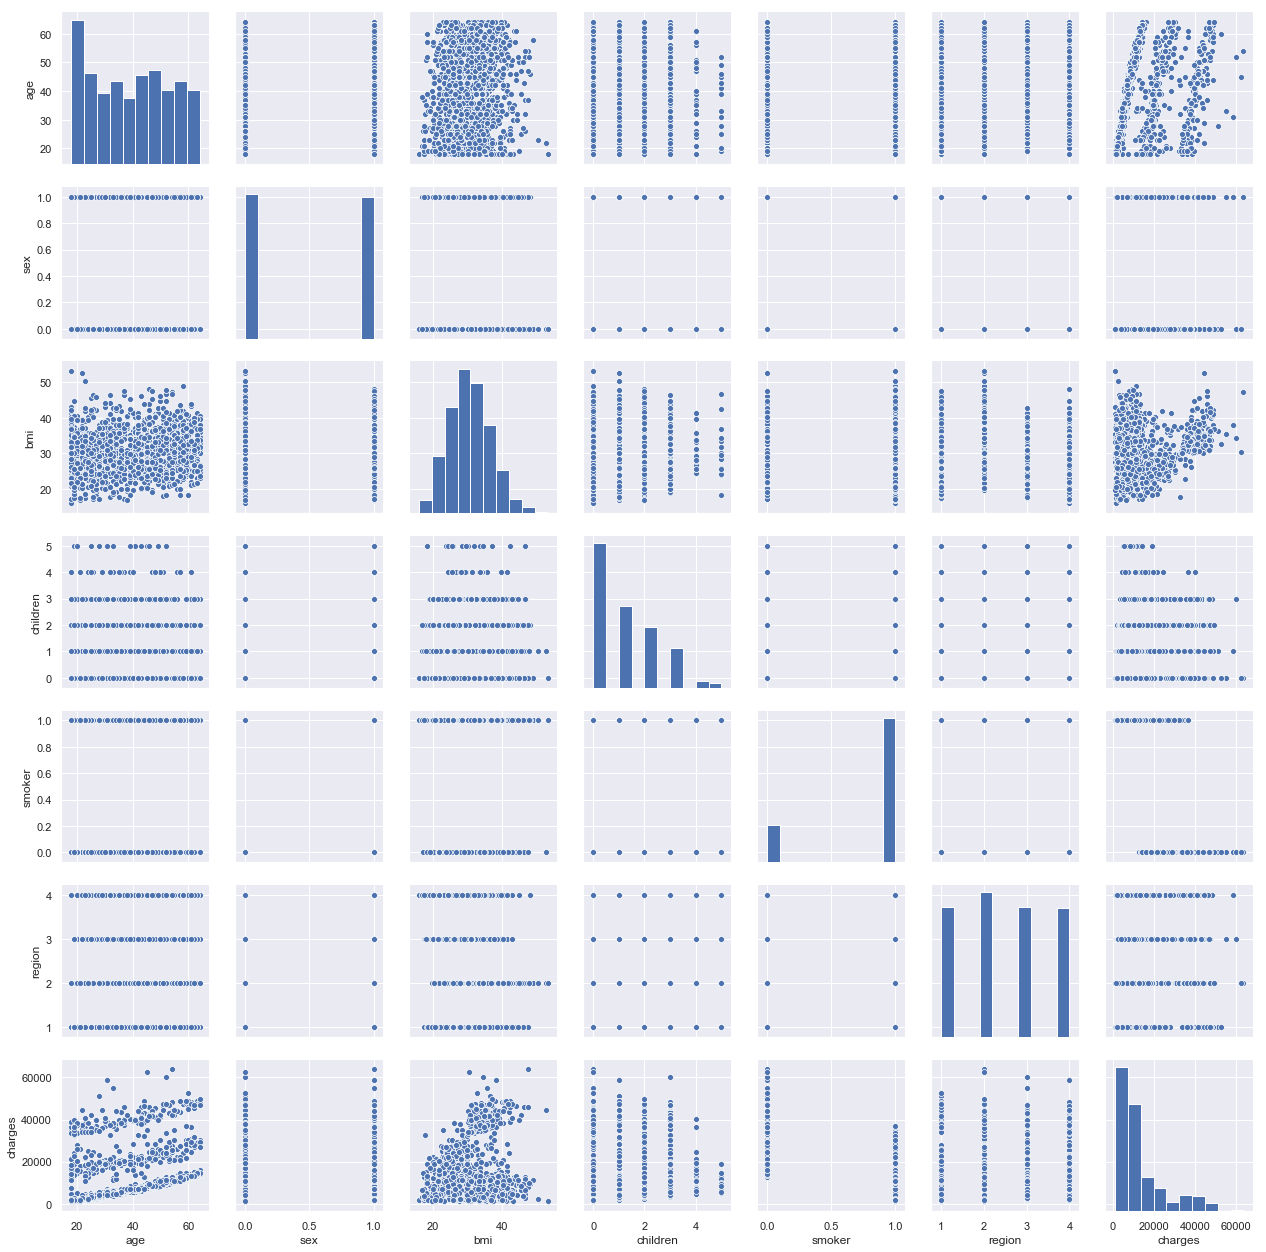

In [72]:
# smoker values replaced with yes = 0 and no = 1
df_smoker_replace = insurance_data_frame.replace(to_replace =['yes','no'], value= [0,1])
# sex values replaced with  male = 0 and female = 1
df_sex_replace = df_smoker_replace.replace(to_replace=['male','female'], value=[0,1])
# region values replaced with southwest = 1, southeast = 2, northwest = 3 and northeast = 4
df_region_replace = df_sex_replace.replace(to_replace=['southwest','southeast','northwest','northeast'], value=[1,2,3,4])
df_region_replace.head()

sns.pairplot(df_region_replace)
plt.show()

# Answer the following questions with statistical evidence

## a) Do charges of people who smoke differ significantly from the people who don't?

Analyse based on Hypothesis test

In [127]:
# Null hypothesis (H0) = "charges has no effect on smoking"
# Ho:p ≤ 0.05
# Alternative Hypotheis(H1) = "charges has effect on smoking"
# H1:p > 0.05

# charges correcting to smokers
x_smoker_charges = np.array(insurance_data_frame[insurance_data_frame['smoker']=='yes']['charges'])
# charges correcting to non-smokers
y_non_smoker_charges = np.array(insurance_data_frame[insurance_data_frame['smoker']=='no']['charges'])

#performing an independant T-test
t, p_value = stats.ttest_ind(x_smoker_charges, y_non_smoker_charges, axis = 0)

print(t, p_value)

46.664921172723716 8.271435842177219e-283


The p_value is grean 0.05 which indicates charges has effect on smoking. so reject the null hypothesis

## b) Does bmi of males differ significantly from that of females?

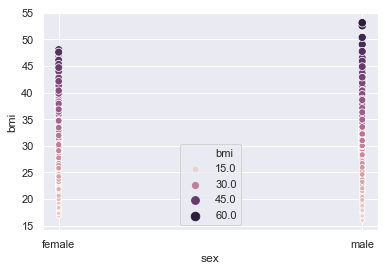

In [273]:
sns.scatterplot(x='sex', y= 'bmi', hue='bmi', size='bmi', data=insurance_data_frame )
plt.show()

Yes. based on about scatter plot shows BMI of male is more compared to female.

In [129]:
# Null hypothesis (H0) = "bmi has no effect on gender"
# Ho:p ≤ 0.05
# Alternative Hypotheis(H1) = "bmi has effect on gender"
# H1:p > 0.05

# bmi corresponds to male
x_male_bmi = np.array(insurance_data_frame[insurance_data_frame['sex']=='male']['bmi'])
# bmi corresponds to female
y_female_bmi = np.array(insurance_data_frame[insurance_data_frame['sex']=='female']['bmi'])

#performing an independant T-test
t, p_value = stats.ttest_ind(x_male_bmi, y_female_bmi, axis = 0)

print(t, p_value)

1.696752635752224 0.08997637178984932


The p_value is greater than 0.05 which indicates that BMI has effect on gender. So reject the null hypothesis

## c) Is the proportion of smokers significantly different in different genders?

smoker,no,yes
sex,,
female,547,115
male,517,159


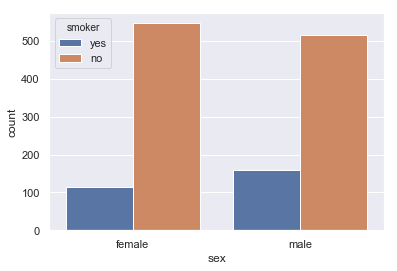

In [274]:

# plot the count plot to show the differnece
sns.countplot(x='sex',hue='smoker',data= insurance_data_frame)
# cross tab of sex and smoker
pd.crosstab(insurance_data_frame['sex'], insurance_data_frame['smoker'])

From the above the data:

females Non- smokers are:547 

male non-smokers are: 517

Total non-smokers are: 547+517 = 1064    

females smokers are:115 

male mokers are: 159

Total smokers are: 115+159 = 274   

In [143]:
# Null Hypothesis--> H0 = "No difference in proportion of smokers in different genders"
# Alternate hypothesis--> H1 = "Difference in proportion of smokers in different genders" 

Expected_value_No_smoker_female = 1064 * (662/1338)

print("Expected_value_No_smoker_female is {}".format(Expected_value_No_smoker_female))

Expected_value_No_smoker_male = 1064 * (676/1338)

print("Expected_value_No_smoker_male is {}".format(Expected_value_No_smoker_male))

Expected_value_smoker_female = 274 * (662/1338)

print("Expected_value_smoker_female is {}".format(Expected_value_smoker_female))

Expected_value_smoker_male = 274 * (676/1338)

print("Expected_value_smoker_male is {}".format(Expected_value_smoker_male))

# perform chi-sqaure test
# sum((observed-expected)^2/expected)


chi_square_Expected_value_No_smoker_female = np.square(547-Expected_value_No_smoker_female)/Expected_value_No_smoker_female
print("chi_square_Expected_value_No_smoker_female is {}".format(chi_square_Expected_value_No_smoker_female))
chi_square_Expected_value_No_smoker_male = np.square(517-Expected_value_No_smoker_male)/Expected_value_No_smoker_male
print("chi_square_Expected_value_No_smoker_male is {}".format(chi_square_Expected_value_No_smoker_male))
chi_square_Expected_value_smoker_female = np.square(115-Expected_value_smoker_female)/Expected_value_smoker_female
print("chi_square_Expected_value_smoker_female is {}".format(chi_square_Expected_value_smoker_female))
chi_square_Expected_value_smoker_male = np.square(159-Expected_value_smoker_male)/Expected_value_smoker_male
print("chi_square_Expected_value_smoker_male is {}".format(chi_square_Expected_value_smoker_male))

chi_square= chi_square_Expected_value_No_smoker_female + chi_square_Expected_value_No_smoker_male +  chi_square_Expected_value_smoker_female + chi_square_Expected_value_smoker_male 

print ("chi_square is {}".format(chi_square))

degreeOfFreedom = (2-1) * (2-1)

print ("degree of freedom is {}".format(degreeOfFreedom))

# verify the chi square statistics 7.76 exceeds the critcal value of chi sqaure distribution. 
# The critical value for alpha of 0.05(95% confidence) is 3.84
# chi square value is 7.76 which is larger than 3.84. so reject the null hypothesis

if chi_square<3.84:
    print("No difference in proportion of smokers in different genders(accept H0)")
else:
    print("Difference in proportion of smokers in different genders(reject H0)")   

Expected_value_No_smoker_female is 526.4334828101644
Expected_value_No_smoker_male is 537.5665171898356
Expected_value_smoker_female is 135.56651718983557
Expected_value_smoker_male is 138.43348281016443
chi_square_Expected_value_No_smoker_female is 0.8034854224352866
chi_square_Expected_value_No_smoker_male is 0.7868451917931356
chi_square_Expected_value_smoker_female is 3.120103976172045
chi_square_Expected_value_smoker_male is 3.0554864382039844
chi_square is 7.765921028604452
degree of freedom is 1
Difference in proportion of smokers in different genders(reject H0)


Yes. male smokers are more compared to female smokers

non-smokers in female category are more when compared to male non-smokers. but the difference is less.


## d) Is the distribution of bmi across women with no children, one child and two children, the same ?

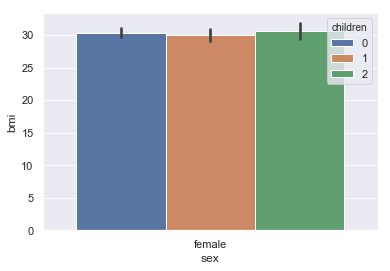

In [146]:
# Null Hypothesis (H0) = "The distribution of bmi across women with no children,one child and two children is not same"
# Alternate hypothesis(H1) = "The distribution of bmi across women with no children,one child and two children is same"

# filter the data set to select only with 0,1 and 2 children
insurance_subset_children = insurance_data_frame[insurance_data_frame['children']<=2]

# filter the data set to select only women with 0,1 and 2 children
insurance_subset_women_children = insurance_subset_children[insurance_subset_children['sex']=='female']
insurance_subset_women_children
sns.barplot(x='sex',y='bmi',hue='children', data=insurance_subset_women_children)
plt.show()

C:\Users\Mahasvin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


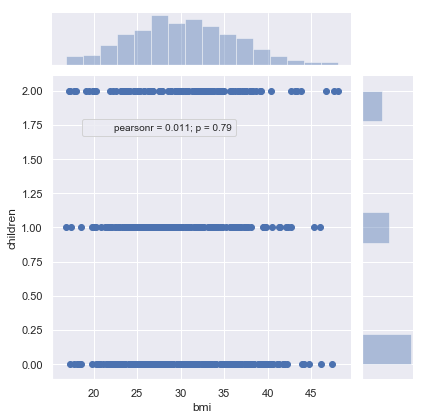

In [149]:
#plot the graph between bmi and children
jointplot = sns.jointplot(insurance_subset_women_children['bmi'],insurance_subset_women_children['children'])
jointplot = jointplot.annotate(stats.pearsonr, fontsize=10, loc=(0.1, 0.8))
plt.show()

The p_value is 0.79 which indicates that the distribution of bmi across women with no children, one child and two children are are same. So reject the Null hypothesis